In [2]:
import pandas as pd
import sqlite3
import numpy as np

In [3]:
con = sqlite3.connect('data.db')
cur = con.cursor()

In [6]:
df = pd.read_csv("RMS_Crime_Incidents.csv")
df.to_sql('crimes', con = con, if_exists='replace')
df.columns

c:\Users\aleja\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (8,15,16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Index(['X', 'Y', 'crime_id', 'report_number', 'address', 'offense_description',
       'offense_category', 'state_offense_code', 'arrest_charge',
       'charge_description', 'incident_timestamp', 'incident_time',
       'day_of_week', 'hour_of_day', 'year', 'scout_car_area', 'precinct',
       'block_id', 'neighborhood', 'council_district', 'zip_code', 'longitude',
       'latitude', 'oid'],
      dtype='object')

In [36]:
pct_20to21_query = """select cast(precinct as integer) as pct, count(distinct report_number) as cnt
                        from crimes 
                        where offense_category = 'WEAPONS OFFENSES'
                        and incident_timestamp >= '2020/03/15 00:00:00+00' 
                        and incident_timestamp <= '2021/03/15 00:00:00+00'
                        group by pct"""
pct_21to22_query = """select cast(precinct as integer) as pct, count(distinct report_number) as cnt
                        from crimes 
                        where offense_category = 'WEAPONS OFFENSES'
                        and incident_timestamp >= '2021/03/15 00:00:00+00' 
                        and incident_timestamp <= '2022/03/15 00:00:00+00'
                        group by pct"""
pct_since2016_query = """select cast(precinct as integer) as pct, year, count(distinct report_number) as cnt
                        from crimes 
                        where offense_category = 'WEAPONS OFFENSES'
                        and year > 2016
                        group by pct, year
                        order by year, pct"""
since2016_bytreatment_query = """select CASE WHEN precinct <= 8 and precinct < 10 then 'ss_zone' else 'outside_ss_zone' end as ss_zone, year, count(distinct report_number) as cnt
                        from crimes 
                        where offense_category = 'WEAPONS OFFENSES'
                        and year > 2016
                        and precinct != 0
                        group by ss_zone, year
                        order by year, ss_zone"""


<AxesSubplot:title={'center':"Weapons offenses per precinct between Mar. '21 and Mar. '22"}, xlabel='pct'>

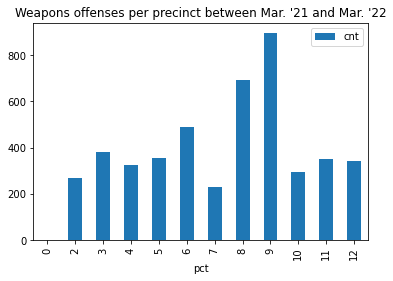

In [18]:
pct_21to22_df = pd.read_sql(pct_21to22_query, con)
pct_21to22_df.plot.bar(x = 'pct', y = 'cnt', title = "Weapons offenses per precinct between Mar. '21 and Mar. '22")

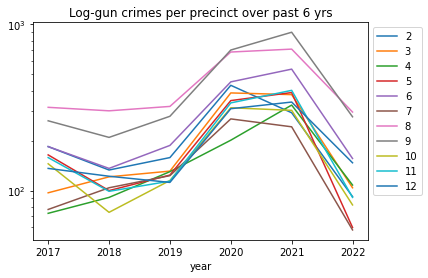

In [42]:
since2016_df = pd.read_sql(pct_since2016_query, con)
since2016_pvt = pd.pivot(since2016_df, columns = 'pct', values = 'cnt', index = 'year')
since2016_pvt.drop([0], axis = 1, inplace=True)
lines_2016 = since2016_pvt.plot.line(logy = True, title = 'Log-gun crimes per precinct over past 6 yrs')
lines_2016.legend(bbox_to_anchor=(1.0, 1.0))

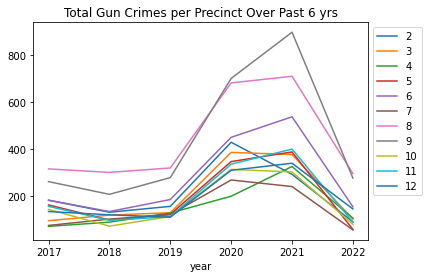

In [43]:
lines_2016 = since2016_pvt.plot.line(title = 'Total Gun Crimes per Precinct Over Past 6 yrs')
lines_2016.legend(bbox_to_anchor=(1.0, 1.0))

In [38]:
since2016_bytreatment_df = pd.read_sql(since2016_bytreatment_query, con)
since2016_bytreatment_pvt = pd.pivot(since2016_bytreatment_df, columns = 'ss_zone', values = 'cnt', index = 'year')
since2016_bytreatment_pvt.head()

ss_zone,outside_ss_zone,ss_zone
year,,
2017,771,1027
2018,809,682
2019,1032,764
2020,2641,1792
2021,3657,1164


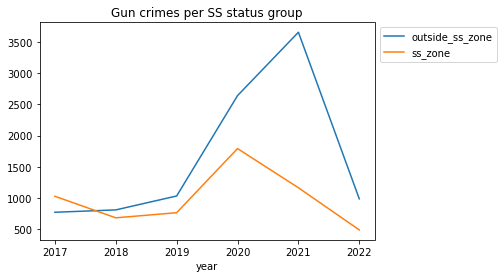

In [44]:
lines_2016_bytmt = since2016_bytreatment_pvt.plot.line(title = 'Gun crimes per SS status group')
lines_2016_bytmt.legend(bbox_to_anchor=(1.0, 1.0))

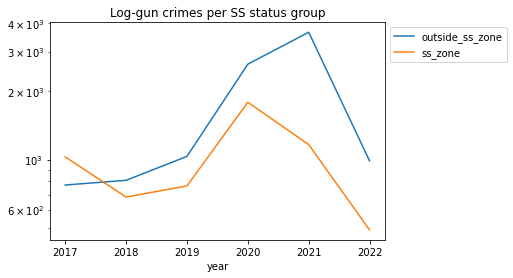

In [46]:
lines_2016_bytmt = since2016_bytreatment_pvt.plot.line(logy = True, title ='Log-gun crimes per SS status group')
lines_2016_bytmt.legend(bbox_to_anchor=(1.0, 1.0))